In [83]:
# Import neccessary Libraries

# For Data Analysis
import pandas as pd
import numpy as np
import datetime

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# For counter
from collections import Counter

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler normalises your data btw 0 & 1

# Classifiers Libraries - machine learning libraries/algorithm
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score


from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation Matrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [84]:
# load Dataset
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [85]:
#Data exploration
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [86]:
df.shape

(45211, 17)

In [88]:
# checking the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [90]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [91]:
# Describe d numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [92]:
# Categorical statistical analysis
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
deposit,45211,2,no,39922


In [95]:
# Check for catgegorical features and its unique values
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


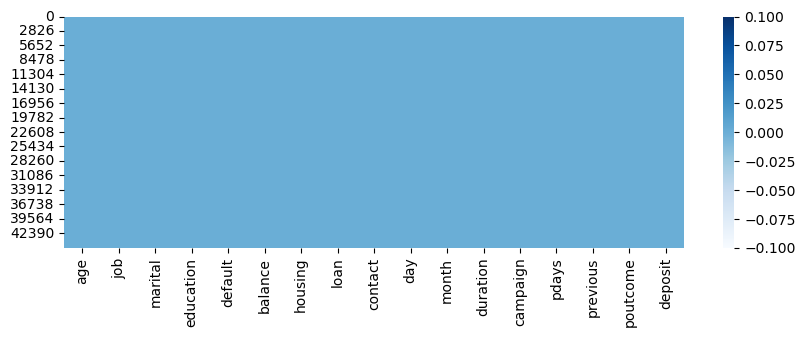

In [96]:
#check for missing vales
print(df.isnull().sum())

#visualise missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues');

### No missing value found

In [99]:
# Finding features with one Value

for column in df.columns:
    print(column, df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


### None Found

In [106]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '%missing values')
else:
    print('No missing value ')

No missing value 


In [110]:
# Categorical features exploration
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [135]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature, len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


### We noticed that:
- we have nine features as previuouly established
- job and month has the highet number of catigorical values in all the features

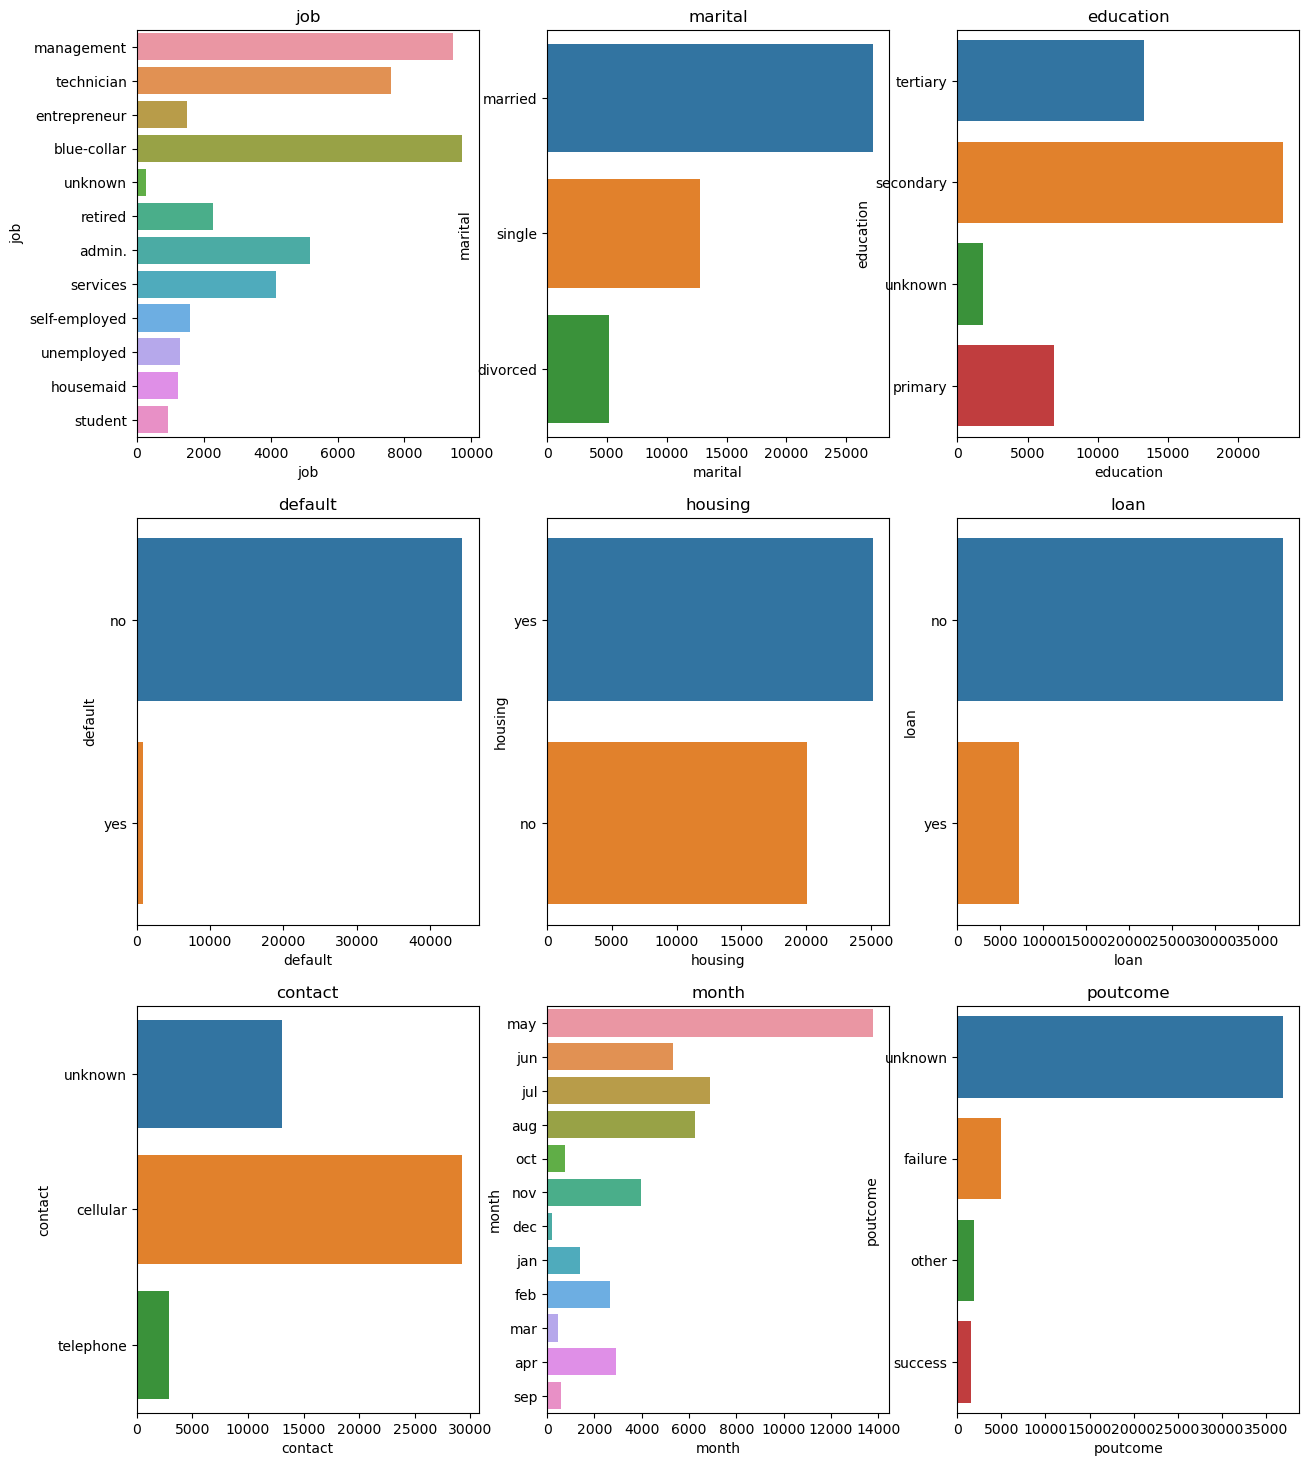

In [136]:
#checking counts based of categorical features.
plt.figure(figsize=(15,75), facecolor= 'white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Naration
- job type blue-collar records are very high in the given datset and housemaid are very less
- for marital staus, we have more of married in the datset with less divorced
- we have more with secondary school educational background in the dataset given
- may month data is more and less in dec
- more were contacted using cellular compared to tellephone.
- the default feature looks not to play important role as it has value of no at high ratio to yes, which can be dropped

### Relationship betweet the Label and categorical data

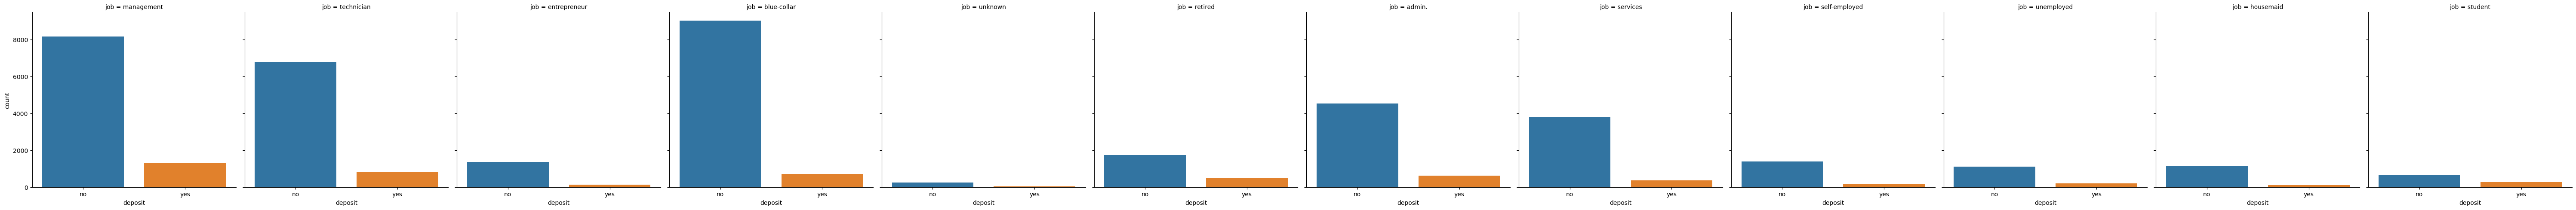

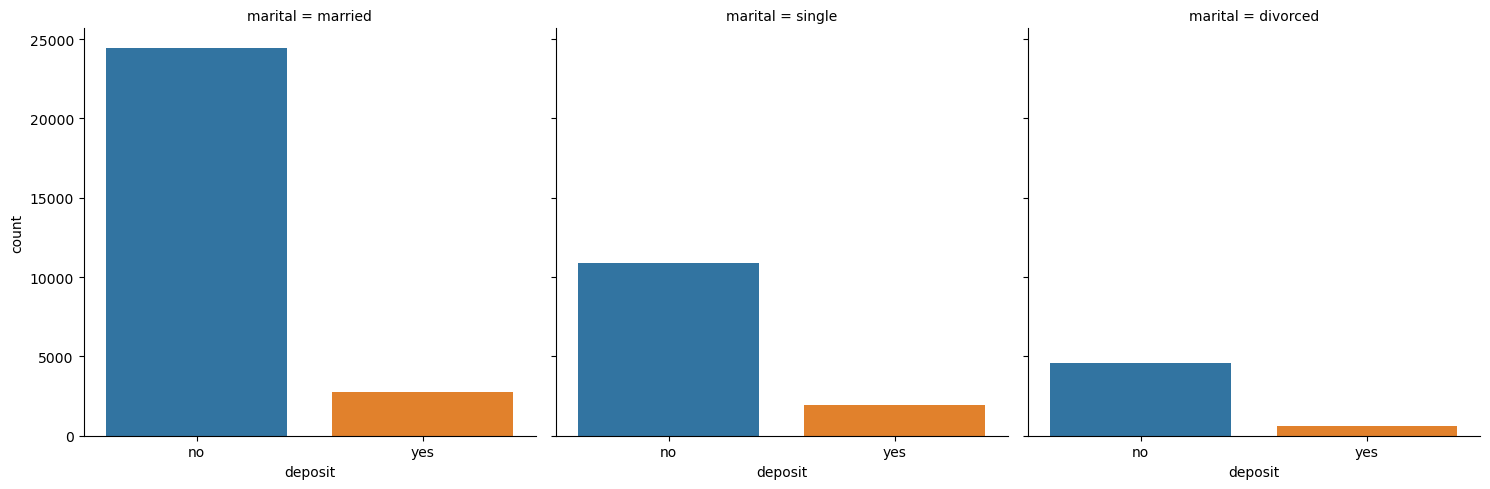

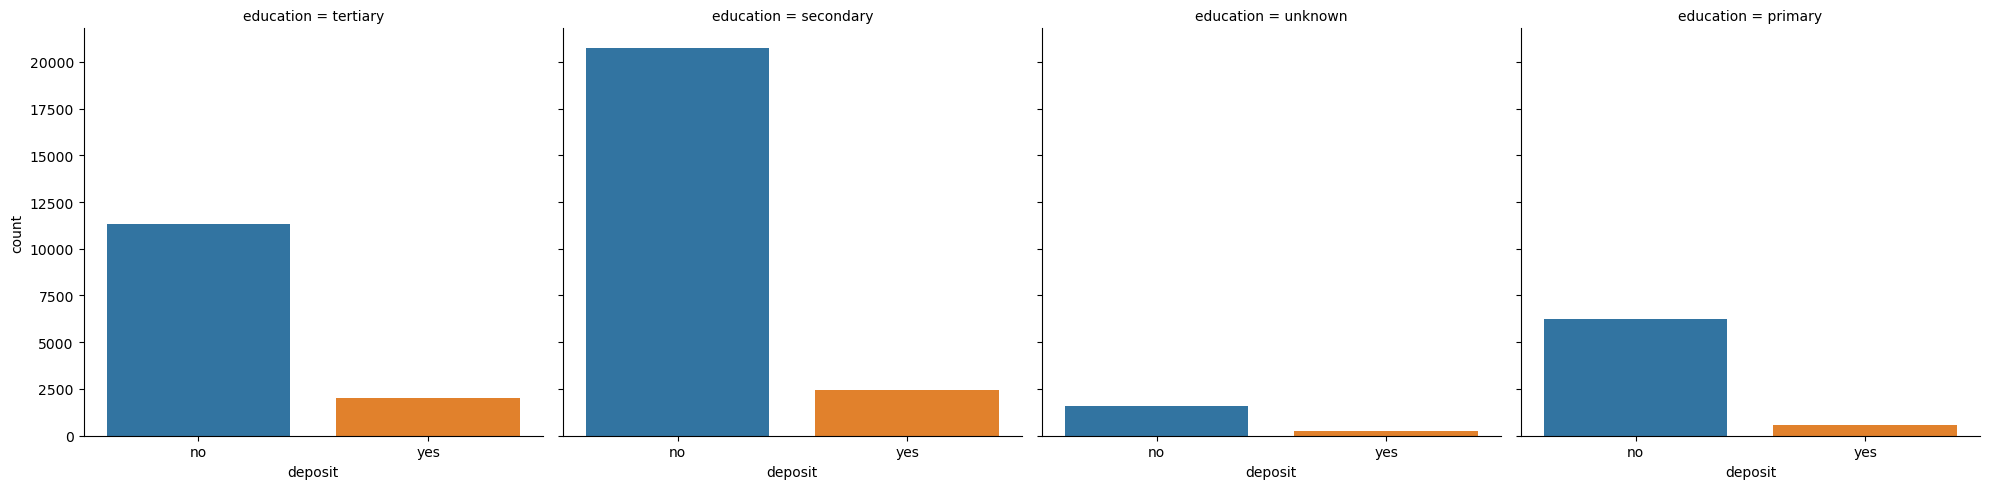

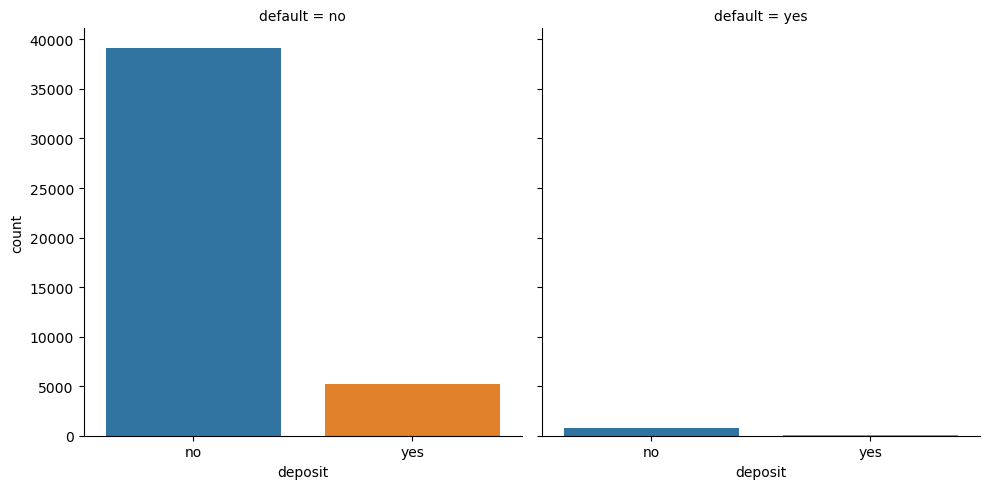

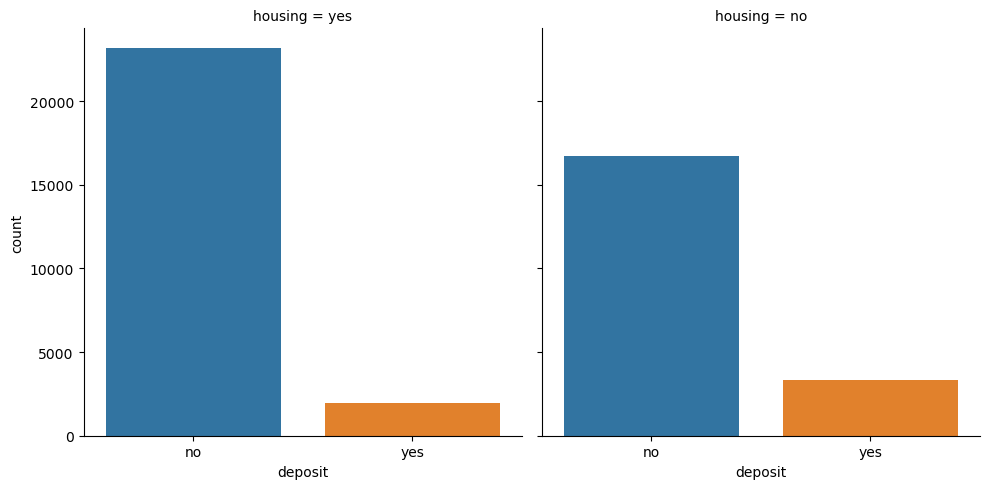

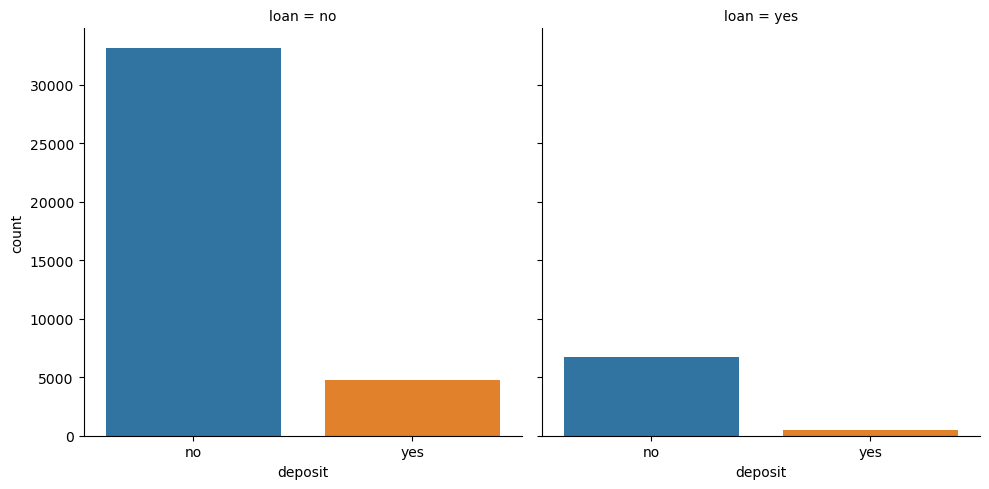

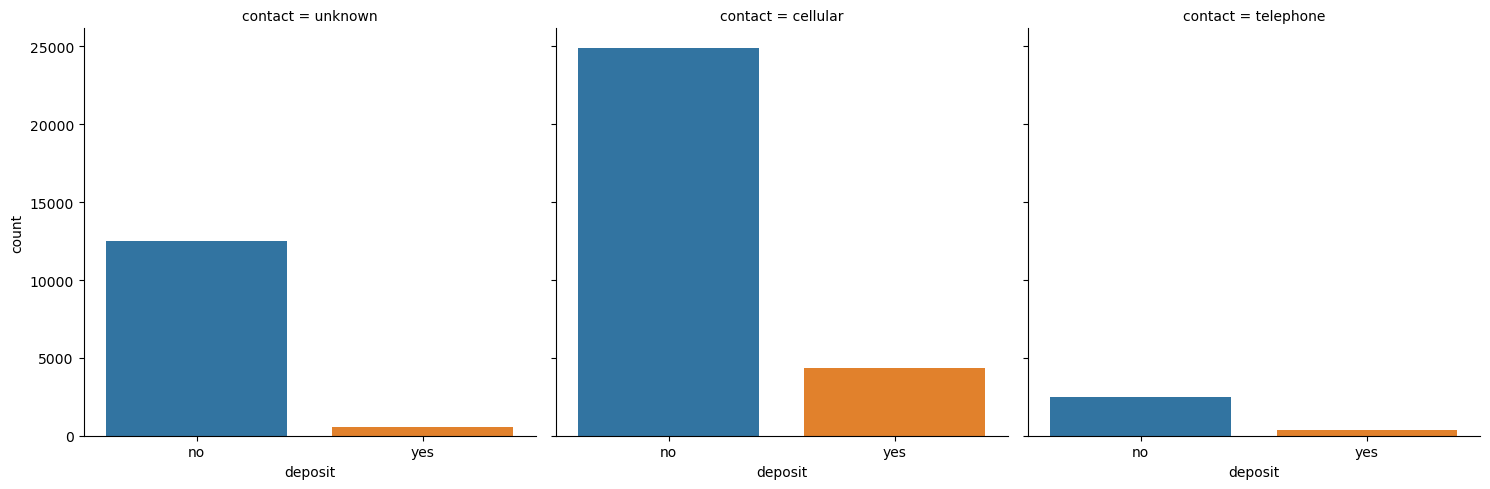

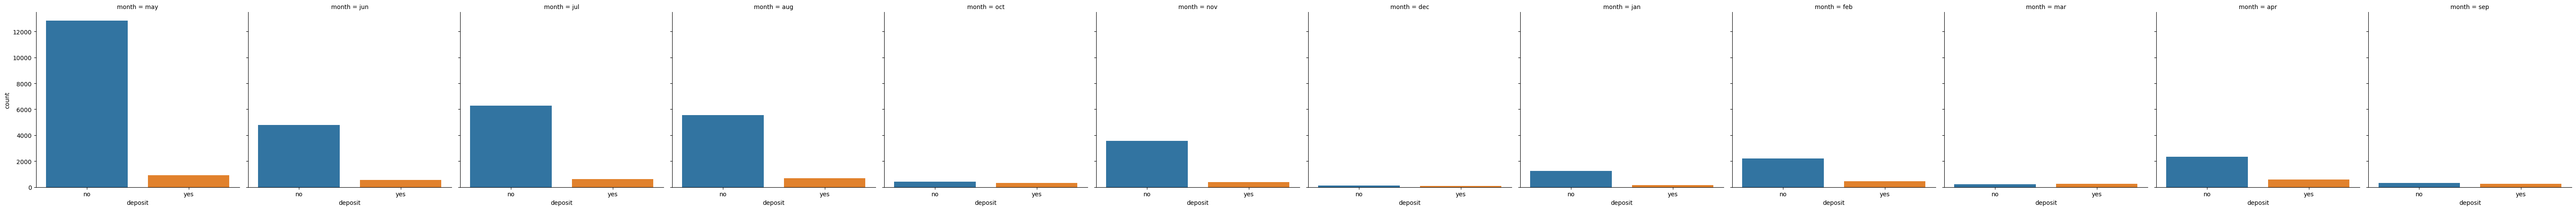

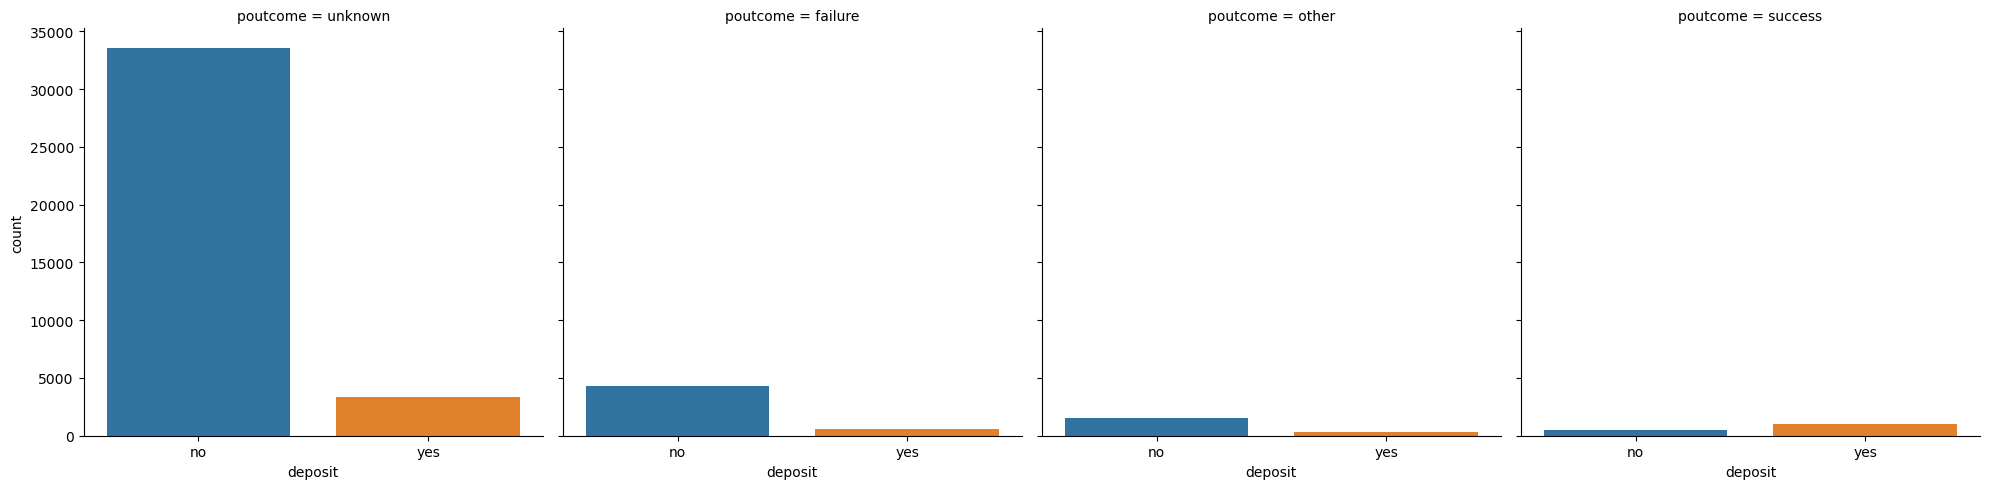

In [137]:
# Checking the label split over categorical features
# find the relationship betweek the dependent variable and the categorical variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data=df)
plt.show()

In [138]:
#Checking spliting target label over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit', categorical_feature]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

### Narration
- Those with housing loan were not interested much on deposit
- in the month of May, April July and August, clients show high interest in deposit.
- if the poutcome is successful, there is a slight chances that the client will show interest

In [141]:
# numrical feature variable list
numerical_features=[feature for feature in df.columns if ((df[feature].dtypes!='O') & (feature not in ['deposit']))]
print('Number of numerical variables:', len(numerical_features))

#visualization of numrical variables
df[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Naration

##### in total there are 7 numerical features.

In [145]:
# Finding Discrete Numerical features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete Variable Count: {}'.format(len(discrete_feature)))

Discrete Variable Count: 0


##### There is no discrete variable in the dataset, hence, no relationship btw discrete numerical features and labels

In [151]:
# Finding Continuous Numerical features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print('Continuous feature Count {}'.format(len(continuous_features)))

Continuous feature Count 7


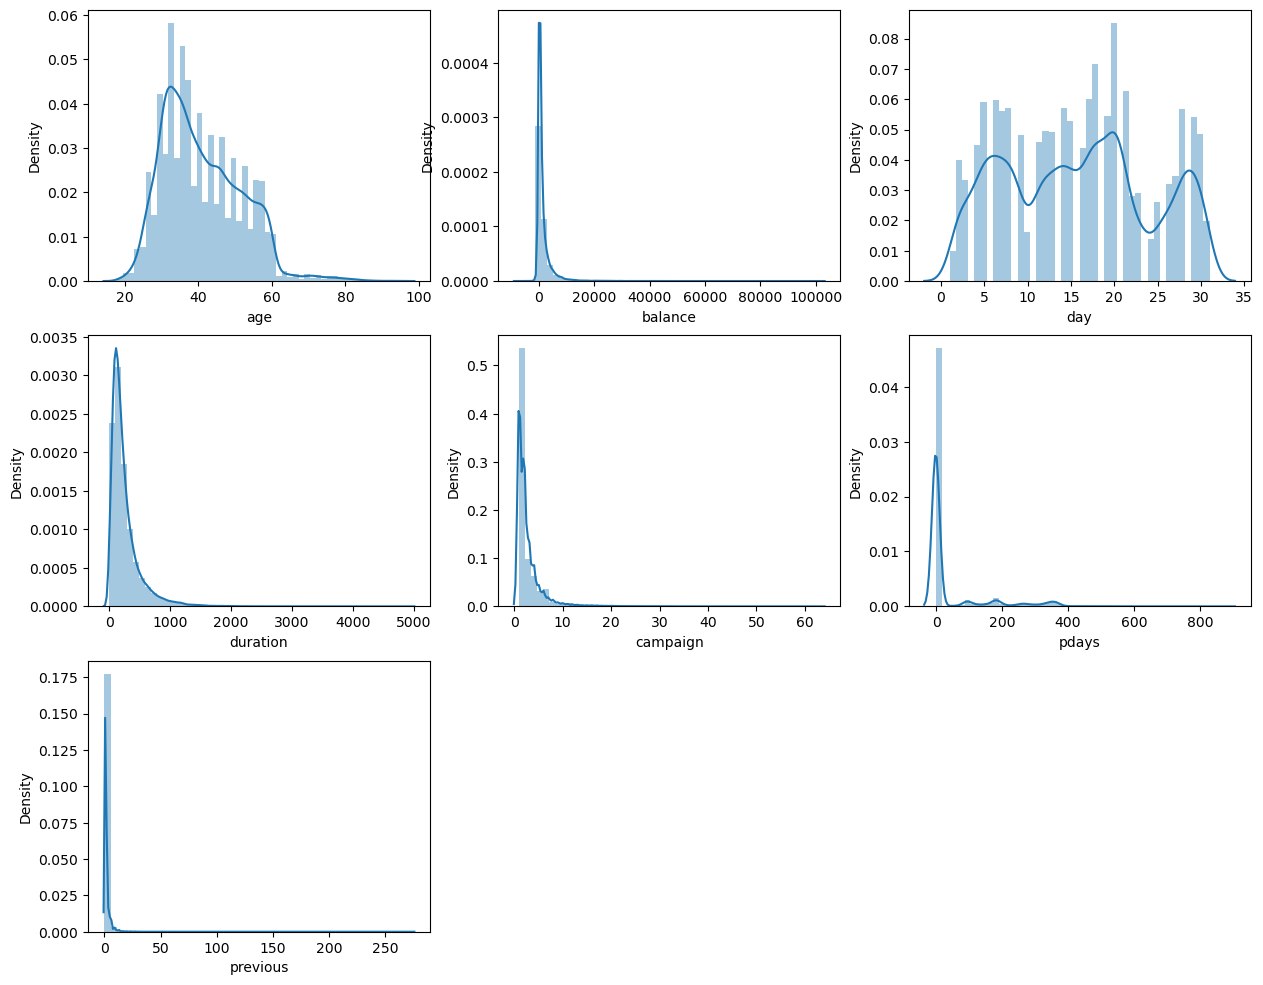

In [152]:
# Finding the continuous features
# plot a nuivariate distribution of the continuous observations
plt.figure(figsize=(15,50),facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

- Looking like the age and days are normally distributed
- the others; balance, campaign, duration pday and previous heavely skewed towads the left with some outliers. 

### Relationship between continuous numerical feature and labels


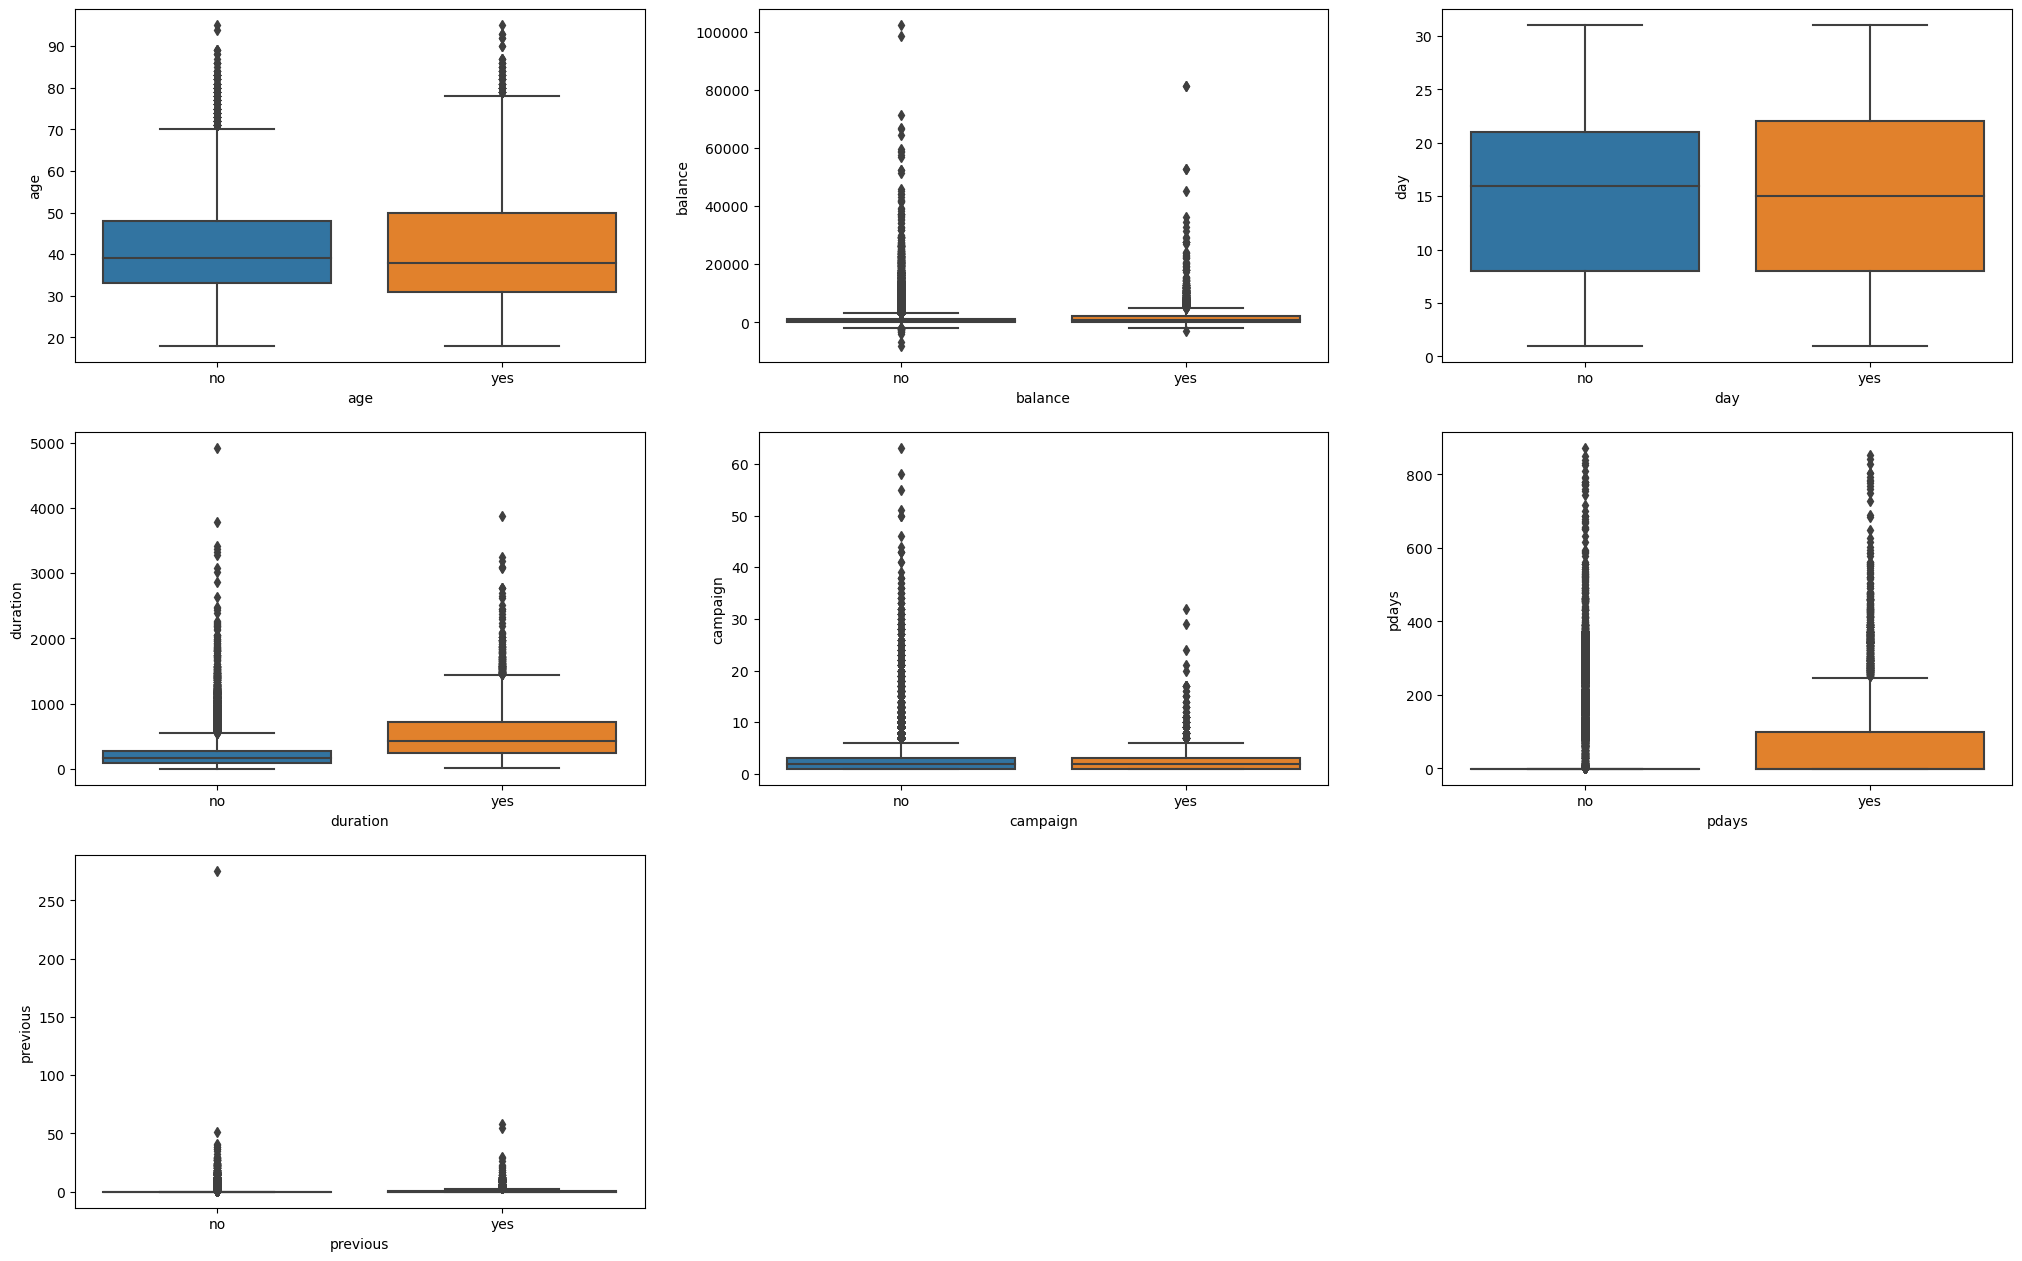

In [157]:
#Using boxplot to show the target distribution with respect to numerical feature
plt.figure(figsize=(25,65), facecolor='white')
pltonumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='deposit', y=df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

- there is an interest in deposit with discussion for longer duration.

### Findinf outliers in numerical features

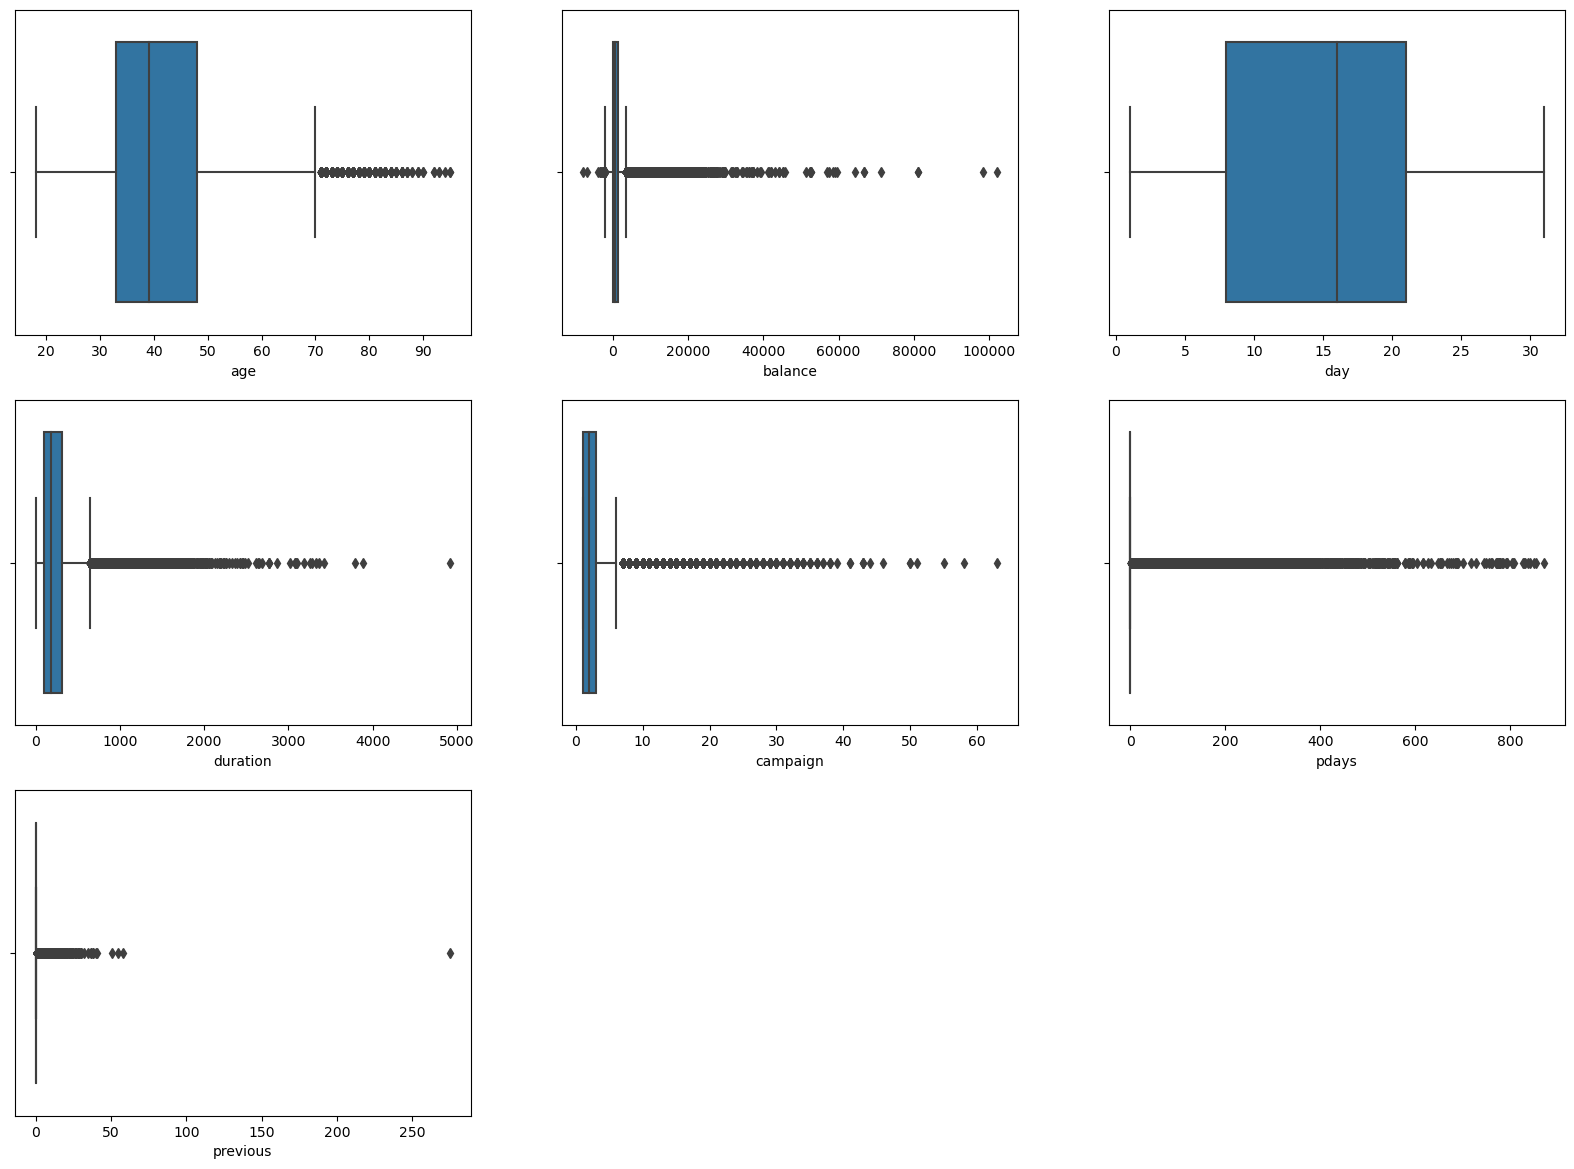

In [158]:
#using boxplot to find outliers on numerical features 
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()
    

- age,campaign, duration, pdays, balance and previous has outliers

### Correlation between numerical features

<AxesSubplot:>

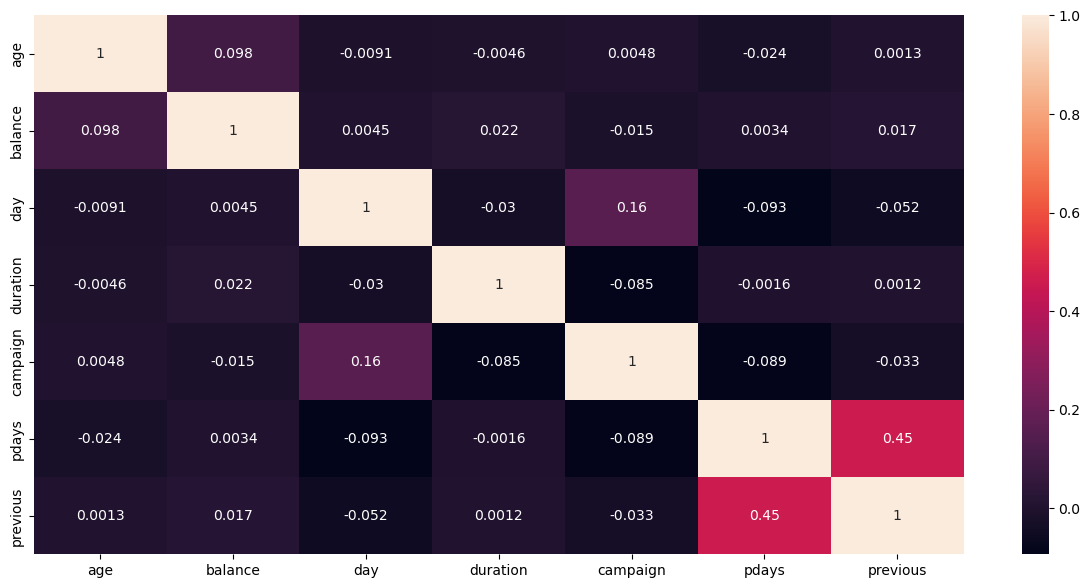

In [159]:
# Check for correlations
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True)

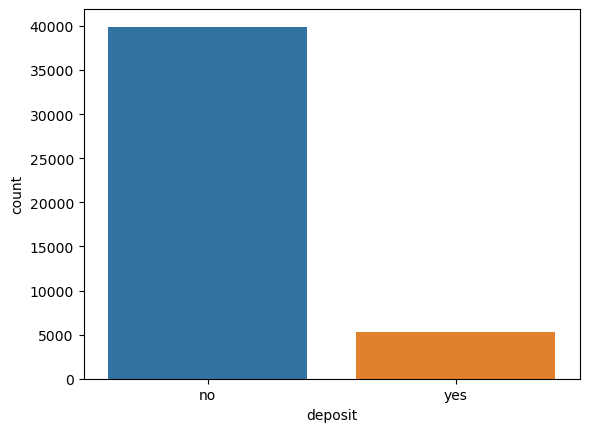

In [160]:
sns.countplot(x='deposit', data=df)
plt.show()

In [162]:
df["deposit"].groupby(df['deposit']).count()

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

### Narration
- dataset not looking balanced

### Feature Engineering

In [197]:
df_1=df.copy()

In [198]:
df_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [201]:
df_1.shape

(45211, 17)

In [202]:
#default_features does not play much role over 95% no
df_1.groupby(['deposit','default']).size()

deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

In [203]:
df_1.drop(['default'], axis=1, inplace=True)

In [204]:
df_1.groupby(['deposit', 'pdays']).size()

deposit  pdays
no       -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
yes       804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

In [205]:
# drop the pdays, it has -1 for about 80%
df_1.drop(['pdays'], axis=1, inplace=True)

In [206]:
# remove outliers in feature age
df_1.groupby('age', sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [207]:
# remove outlier in feature balance
df_1.groupby(['deposit','balance'], sort=True)['balance'].count()

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

- outliers shoul not be removed as balance is high, client show interent on deposit

In [239]:
# remove outlier in feature duration
df_1.groupby(['deposit','duration'], sort=True)['duration'].count()

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

- outliers shoul not be removed as duration is high, client show interent on deposit

In [240]:
# remove outlier in feature campaign
df_1.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [241]:
df_2 =df_1[df_1['campaign'] < 33]

In [242]:
df_2.groupby(['deposit','campaign'], sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
         6            1199
         7             688
         8             508
         9             306
         10            252
         11            185
         12            151
         13            127
         14             89
         15             80
         16             77
         17             63
         18             51
         19             44
         20             42
         21             34
         22             23
         23             22
         24             19
         25             22
         26             13
         27             10
         28             16
         29             15
         30              8
         31             12
         32              8
yes      1            2561
         2            1401
         3             618
         4             317
         5

In [243]:
# remove outlier in feature previous
df_2.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           33532
         1            2189
         2            1650
         3             848
         4             543
                     ...  
yes      26              1
         29              1
         30              1
         55              1
         58              1
Name: previous, Length: 66, dtype: int64

In [251]:
df_4 =df_2[df_2['previous'] < 31]

In [253]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df_4 = pd.concat([df_4.drop(col, axis=1),pd.get_dummies(df_4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [254]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df_4[col+'_new']=df_4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_4.drop(col, axis=1, inplace=True)

In [263]:
df_4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### Spliting Dataset into Training set and Test set

In [270]:
X = df_4.drop(['deposit_new'],axis=1)
y = df_4['deposit_new']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [271]:
len(X_train)

36128

In [275]:
X_train.head(3)

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
9253,55,0,5,353,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
12497,22,280,2,63,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
44758,28,1595,9,1,1,4,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [272]:
len(X_test)

9033

In [276]:
y_train.head(3)

9253     0
12497    0
44758    0
Name: deposit_new, dtype: int64

### Model Selection

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90340437 0.90921672 0.90423471 0.90283737 0.90615917]
0.905170467659557


In [283]:
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90603377 0.90880155 0.90617216 0.90408304 0.90602076]
0.9062222558484979


In [284]:
logreg = LogisticRegression() 

logreg.fit(X_train, y_train) 

ly_pred = logreg.predict(X_test) 

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8906232702313739
Precision: 0.613941018766756
Recall: 0.21342031686859272
F1-score: 0.31673582295988933
AUC-ROC: 0.597664932303643


### Narration
From the model, Accuracy of the model is 89%, Precision is 61%, AUC-ROC is 59% while Recall and F1-scrore have 21 and 31% respectively

In [285]:
ly_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [286]:
y_test

26094    0
44238    0
11793    0
41754    0
38776    0
        ..
17819    0
4654     0
8230     0
21150    0
40317    0
Name: deposit_new, Length: 9033, dtype: int64

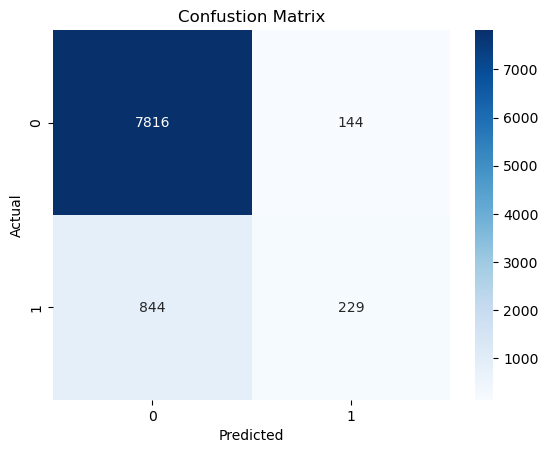

In [287]:
# Creating a confusion matrix
logcm = confusion_matrix(y_test, ly_pred)

#Visualisation Using Confustion Matrix
sns.heatmap(logcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix')
plt.show()

### Narration
- in the confusion matrix, the the LogisticRegression model, the TP is 7816, and the  is 144

In [288]:
# Model Building

# Random Forest Classifier

ramfor = RandomForestClassifier() # ML

ramfor.fit(X_train, y_train) # this is ML

rfy_pred = ramfor.predict(X_test) # test to predict

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.8988154544448135
Precision: 0.62402496099844
Recall: 0.3727865796831314
F1-score: 0.4667444574095682
AUC-ROC: 0.6712550988867918


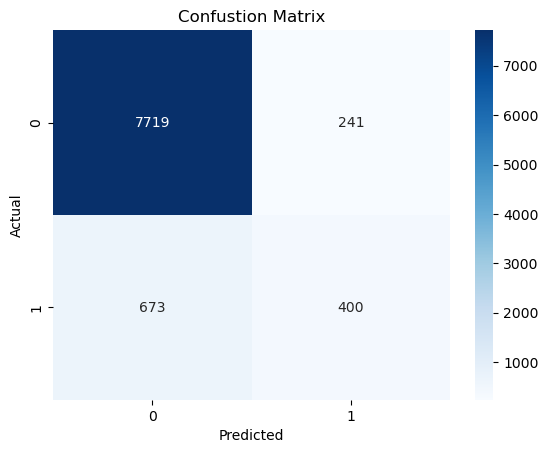

In [289]:
# Create a confusion matrix

rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confustion Matrix')
plt.show()

In [290]:
# 8 Machine Learning Algorithms will be applied to the dataset.

classifiers = [[XGBClassifier(), 'XGB Classifier'], [RandomForestClassifier(), 'Random Forest'], [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(), 'SGD Classifier'], [SVC(), 'SVC'], [GaussianNB(), 'Naive Bayes'], [DecisionTreeClassifier(random_state = 42), 'Decision tree'], [LogisticRegression(), 'Logistic Regression']]

In [291]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name !=classifiers[-1][1]:
        print('')

In [292]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassi

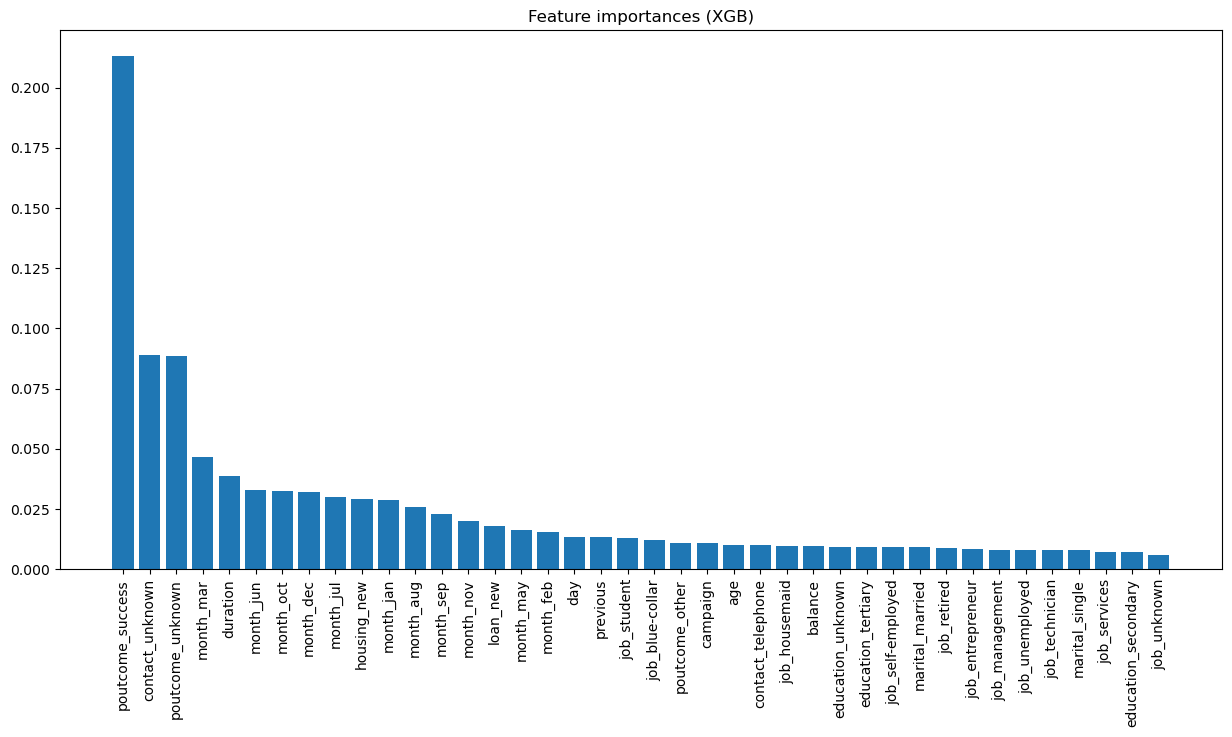

In [300]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [294]:
classifiers[0]

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'XGB Classifier']

In [295]:
acc_list

{'XGB Classifier': ['90.27%'],
 'Random Forest': ['89.87%'],
 'K-Nearest Neighbours': ['87.42%'],
 'SGD Classifier': ['88.07%'],
 'SVC': ['88.15%'],
 'Naive Bayes': ['85.85%'],
 'Decision tree': ['87.03%'],
 'Logistic Regression': ['89.06%']}

In [296]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,90.27%,89.87%,87.42%,88.07%,88.15%,85.85%,87.03%,89.06%


In [297]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,61.58%,62.74%,43.66%,0.0%,60.0%,41.74%,45.48%,61.39%


In [298]:
print('Recall')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,48.09%,36.25%,20.22%,0.0%,0.84%,48.28%,46.41%,21.34%


In [299]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,72.02%,66.68%,58.35%,49.97%,50.38%,69.6%,69.46%,59.77%


Base on the results of the deployed model, it is noticed that XGB Classifier, Random Forest, Naive Bayes, Decision tree and Logistic Regression were performimg well.